In [4]:
import pandas as pd
import json
from pprint import pprint

ImportError: cannot import name register_extension_dtype

In [3]:
df = pd.read_csv(filepath_or_buffer="hackathon_price_data.csv")
df.head(n=3)

,Mcat Name,Subcat name,PC_ITEM_ID,PC_ITEM_NAME,FK_IM_SPEC_MASTER_DESC,FK_IM_SPEC_OPTIONS_DESC,PC_ITEM_FOB_PRICE,PC_ITEM_MOQ_UNIT_TYPE
0,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",1,Touch Panel,Display Size,"15.6"" to 80 """,5500.0,Piece
1,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",2,Human Machine Interface,Type,Fully Automatic,4500.0,Unit
2,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,Display Type,TFT,12000.0,Unit


In [12]:
df["type-value"] = df.apply(lambda row: row['FK_IM_SPEC_MASTER_DESC'] + "_" + str(row["FK_IM_SPEC_OPTIONS_DESC"]), axis=1)

In [15]:
df = df.drop(['FK_IM_SPEC_MASTER_DESC', 'FK_IM_SPEC_OPTIONS_DESC'], axis=1)

In [16]:
df.head(n=10)

,Mcat Name,Subcat name,PC_ITEM_ID,PC_ITEM_NAME,PC_ITEM_FOB_PRICE,PC_ITEM_MOQ_UNIT_TYPE,type-value
0,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",1,Touch Panel,5500.0,Piece,"Display Size_15.6"" to 80 """
1,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",2,Human Machine Interface,4500.0,Unit,Type_Fully Automatic
2,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Display Type_TFT
3,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Model Number/Name_GOT
4,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Product Type_HMI
5,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Brand_Mitsubishi
6,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,"Size_5',7.5',10,15"
7,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,"Screen Size_5,7,10,15"
8,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",4,HMI Touch Panels,10000.0,Unit,Display Type_Digital
9,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",4,HMI Touch Panels,10000.0,Unit,Type_Fully Automatic


In [27]:
dfj = json.loads(df.to_json(orient="records"))
len(dfj)
id_to_specs = {}
for x in dfj:
    xid = x["PC_ITEM_ID"]
    id_to_specs.setdefault(xid, {})
    type_value = x.pop('type-value')
    try:
        xid_type, xid_val = "_".join(type_value.split("_")[:-1]), type_value.split("_")[-1]
        xid_type = xid_type.lower().strip()
        xid_val = xid_val.lower().strip()
        id_to_specs[xid].setdefault(xid_type, [])
        id_to_specs[xid][xid_type].append(xid_val)
    except Exception as e:
        pprint(type_value)
    for each in x.keys():
        id_to_specs[xid].setdefault(each, [])
        id_to_specs[xid][each].append(x[each])
len(id_to_specs)

9392

In [28]:
id_to_specs.keys()[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
pprint(id_to_specs[1])

{u'Mcat Name': [u'HMI Touch Panel'],
 u'PC_ITEM_FOB_PRICE': [5500.0],
 u'PC_ITEM_ID': [1],
 u'PC_ITEM_MOQ_UNIT_TYPE': [u'Piece'],
 u'PC_ITEM_NAME': [u'Touch Panel'],
 u'Subcat name': [u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units'],
 u'display size': [u'15.6"  to 80 "']}


In [33]:
for x in id_to_specs:
    for each in id_to_specs[x].keys():
        id_to_specs[x][each] = list(set(id_to_specs[x][each]))

In [34]:
id_to_specs[8]

{u'Mcat Name': [u'HMI Touch Panel'],
 u'PC_ITEM_FOB_PRICE': [10000.0],
 u'PC_ITEM_ID': [8],
 u'PC_ITEM_MOQ_UNIT_TYPE': [u'PER PIECE'],
 u'PC_ITEM_NAME': [u'Siemens HMI & Displays'],
 u'Subcat name': [u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units'],
 u'brand': [u'siemens'],
 u'display type': [u'tft'],
 u'screen type': [u'keypad + touch'],
 u'type': [u'manual', u'fully automatic']}

In [35]:
provided_keys = ['Mcat Name', 'PC_ITEM_FOB_PRICE', 'PC_ITEM_ID', 'PC_ITEM_MOQ_UNIT_TYPE', 'PC_ITEM_NAME', 'Subcat name']

In [41]:
for each in id_to_specs:
    x = id_to_specs[each]
    for key in provided_keys:
        id_to_specs[each][key] = id_to_specs[each][key][0]

In [42]:
pprint(id_to_specs[8])

{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 10000.0,
 u'PC_ITEM_ID': 8,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'PER PIECE',
 u'PC_ITEM_NAME': u'Siemens HMI & Displays',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'brand': [u'siemens'],
 u'display type': [u'tft'],
 u'screen type': [u'keypad + touch'],
 u'type': [u'manual', u'fully automatic']}


In [44]:
for i in range(1,20):
    pprint(id_to_specs[i])

{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 5500.0,
 u'PC_ITEM_ID': 1,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'Piece',
 u'PC_ITEM_NAME': u'Touch Panel',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'display size': [u'15.6"  to 80 "']}
{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 4500.0,
 u'PC_ITEM_ID': 2,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'Unit',
 u'PC_ITEM_NAME': u'Human Machine Interface',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'type': [u'fully automatic']}
{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 12000.0,
 u'PC_ITEM_ID': 3,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'Unit',
 u'PC_ITEM_NAME': u'Mitsubishi HMI',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'brand': [u'mitsubishi'],
 u'display type': [u'tft'],
 u'model number/name': [u'got'],
 u'product type': [u'hmi'],
 u'screen size': [u'5,7,10,15'],
 u'siz

In [46]:
mcat_to_specs = {}
for each in id_to_specs:
    x = id_to_specs[each]
    mcat = x['Mcat Name'].lower().strip()
    mcat_to_specs.setdefault(mcat, [])
    mcat_to_specs[mcat].append(x)
len(mcat_to_specs)

100

In [47]:
mcat_to_specs.keys()[:10]

[u'steam iron',
 u'copper cables',
 u'single phase induction motors',
 u'bag filling machine',
 u'mens capri',
 u'bottle filling machines',
 u'wooden crates',
 u'busbar systems',
 u'coffee makers',
 u'belt conveyors']

In [48]:
mcat_to_specs['steam iron']

[{u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 2280.0,
  u'PC_ITEM_ID': 4539,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'Unit',
  u'PC_ITEM_NAME': u'Leaf Base Steam Iron',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'power': [u'1200 w']},
 {u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 500.0,
  u'PC_ITEM_ID': 4540,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'Piece',
  u'PC_ITEM_NAME': u'Steam Iron',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'brand': [u'havells, philips, bajaj'],
  u'color': [u'any'],
  u'iron type': [u'any'],
  u'model number': [u'any'],
  u'power': [u'any']},
 {u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 2200.0,
  u'PC_ITEM_ID': 4541,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'Piece',
  u'PC_ITEM_NAME': u'Steam Boiler Iron',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'brand': [u'steamfab'],
  u'color': [u'white & blu'],
  u'iron type': 

In [49]:
unit_grouped = {}
for each in mcat_to_specs:
    unit_grouped.setdefault(each, {})
    tmp = {}
    for x in mcat_to_specs[each]:
        item_unit = x['PC_ITEM_MOQ_UNIT_TYPE'].lower().strip()
        tmp.setdefault(item_unit, [])
        tmp[item_unit].append(x)
    unit_grouped[each] = tmp
len(unit_grouped)

100

In [54]:
pprint(unit_grouped['steam iron'].keys())

[u'box', u'set', u'no', u'number', u'foot', u'piece', u'unit']


In [1]:
unit_grouped['hmi touch panel'].keys()

NameError: name 'unit_grouped' is not defined

In [57]:
m = -1
max_l = -1
max_mcat = []
max_unit = ""
for each in unit_grouped:
    for unit in unit_grouped[each]:
        max_mcat.append([each, unit, len(unit_grouped[each][unit])])

In [469]:
max_mcat.sort(key=lambda x: x[2], reverse=True)
max_mcat

[[u'ladies palazzo', u'piece', 826],
 [u'marble god statue', u'piece', 431],
 [u'bio fertilizers', u'kilogram', 238],
 [u'belt conveyors', u'unit', 219],
 [u'rubber conveyor belt', u'meter', 205],
 [u'electric irons', u'piece', 199],
 [u'hmi touch panel', u'piece', 171],
 [u'bio fertilizers', u'litre', 140],
 [u'belt conveyors', u'piece', 134],
 [u'juicer mixer grinder', u'piece', 127],
 [u'roller conveyor', u'piece', 112],
 [u'copper earthing electrode', u'piece', 107],
 [u'womens capri', u'piece', 105],
 [u'liquid filling machine', u'unit', 105],
 [u'fleece fabrics', u'kilogram', 103],
 [u'dyed polyester yarn', u'kilogram', 102],
 [u'hmi touch panel', u'unit', 100],
 [u'roller conveyor', u'unit', 99],
 [u'eco friendly disposable plates', u'piece', 98],
 [u'bottle filling machines', u'unit', 95],
 [u'belt conveyors', u'meter', 95],
 [u'liquid filling machine', u'piece', 95],
 [u'three phase induction motor', u'piece', 89],
 [u'biometric devices', u'piece', 85],
 [u'acme safety shoes',

In [ ]:
unit_gouped

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [593]:
test_set = unit_grouped['ladies palazzo']['piece']

In [594]:
len(test_set)

826

In [543]:
price = [x['PC_ITEM_FOB_PRICE'] for x in test_set]

In [268]:
y = [0]*len(price)

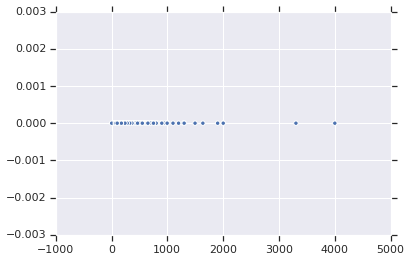

In [269]:
plt.scatter(price,y)

In [69]:
from sklearn.mixture import GMM
gmm = GMM(3, n_iter=1)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [273]:
price_arr = [[x] for x in price]
price_arr = np.array(price_arr)
price_arr.shape

(826, 1)

In [123]:
X = np.array(price_arr)
gmm = GMM(n_components=10).fit(X)
labels = gmm.predict(X)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

In [124]:
probs = gmm.predict_proba(X)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [125]:
probs[:5].round(3)

array([[0.169, 0.   , 0.327, 0.   , 0.304, 0.02 , 0.   , 0.   , 0.18 ,
        0.   ],
       [0.   , 0.865, 0.   , 0.   , 0.   , 0.135, 0.   , 0.   , 0.   ,
        0.   ],
       [0.169, 0.   , 0.327, 0.   , 0.304, 0.02 , 0.   , 0.   , 0.18 ,
        0.   ],
       [0.162, 0.   , 0.328, 0.   , 0.292, 0.022, 0.   , 0.   , 0.196,
        0.   ],
       [0.162, 0.   , 0.328, 0.   , 0.292, 0.022, 0.   , 0.   , 0.196,
        0.   ]])

In [97]:
X[:5]

array([[ 395.],
       [1300.],
       [ 395.],
       [ 399.],
       [ 399.]])

In [98]:
len(X)

826

In [100]:
X.shape

(826, 1)

In [101]:
Y = np.array([[i] for i in range(826)])
Y.shape

(826, 1)

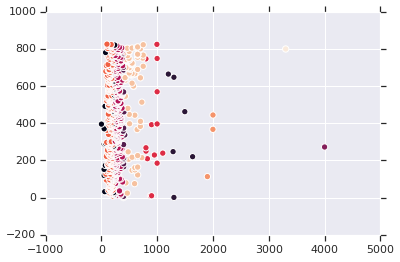

In [126]:
plt.scatter(X, Y, c=labels, s=40);

In [127]:
size = 50 * probs.max(1) ** 10
size.shape

(826,)

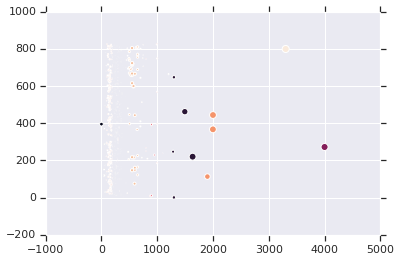

In [128]:
plt.scatter(X,Y, c=labels, s=size)

In [180]:
from matplotlib.patches import Ellipse
facecolor = ['red', 'green', 'yellow', 'black', 'grey']

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle,**kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='spring', s=40, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    cnt = 0
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        fc = facecolor[cnt]
        draw_ellipse(pos, covar, ec=fc, alpha=w * w_factor)
        cnt += 1

In [137]:
X = np.array(price_arr)
arr = np.array([X[:,0], Y[:, 0]])
arr.shape

(2, 826)

In [138]:
arr = arr.T

In [139]:
arr.shape

(826, 2)

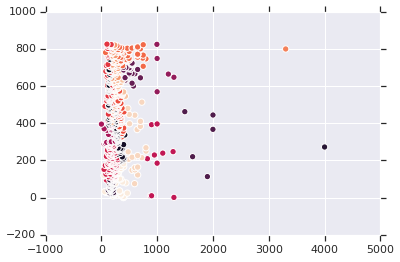

In [185]:
plt.scatter(arr[:, 0], arr[:, 1], c=labels, s=40);

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

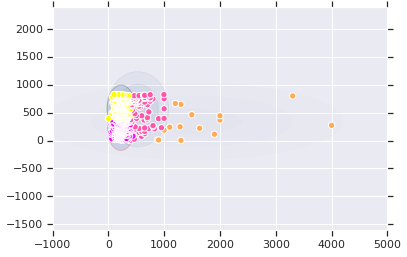

In [181]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, arr)

In [170]:
%matplotlib.__version__

UsageError: Line magic function `%matplotlib.__version__` not found.


In [187]:
cluster_stats = pd.DataFrame(data=gmm.means_)

In [189]:
corr = cluster_stats.transpose().corr()

In [191]:
mask = np.zeros_like(corr, dtype=np.bool)

In [192]:
mask[np.triu_indices_from(mask)] = True

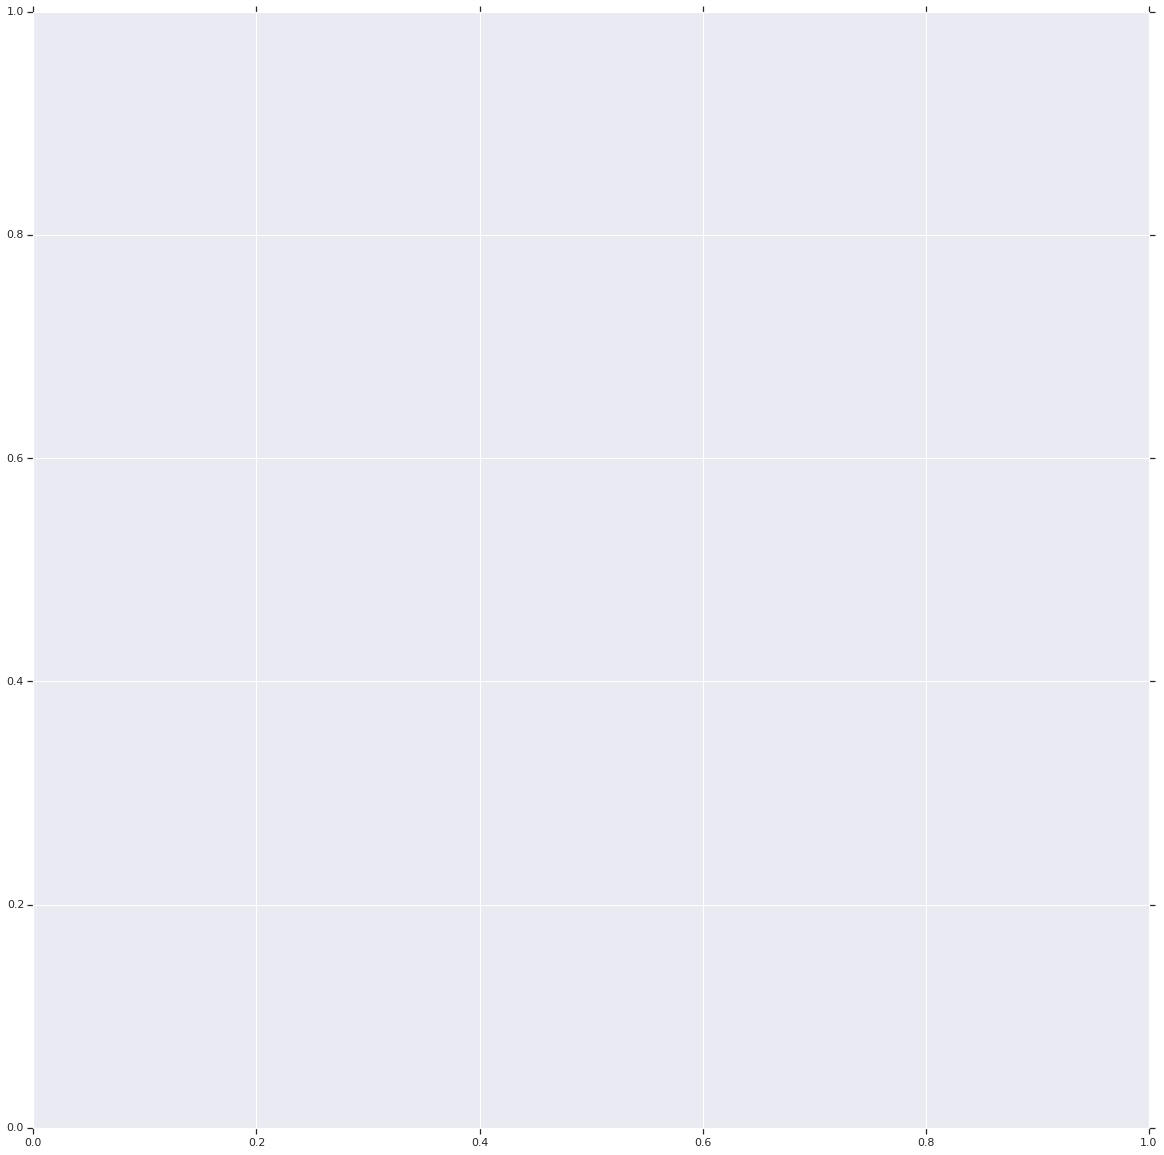

In [193]:
f, ax = plt.subplots(figsize=(20, 20))

In [194]:
import seaborn as sns

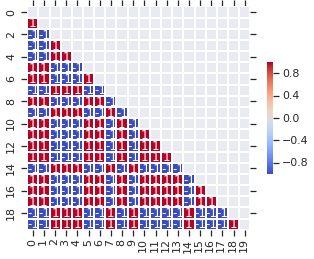

In [195]:
sns.heatmap(corr, mask=mask, cmap="coolwarm",
            vmin=-1, vmax=1, square=True, center=0,
            linewidths=.5, cbar_kws={"shrink": .5},
           annot=True)

In [197]:
log_prob = gmm.score_samples(arr)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [199]:
your_choice = 0.07


In [203]:
arr

array([[3.95e+02, 0.00e+00],
       [1.30e+03, 1.00e+00],
       [3.95e+02, 2.00e+00],
       ...,
       [1.75e+02, 8.23e+02],
       [9.95e+02, 8.24e+02],
       [1.00e+02, 8.25e+02]])

In [201]:
plt.figure(figsize=(20,5))

sns.distplot(log_prob[:,0], kde=False, bins=100, color="Red")
g1 = plt.axvline(np.quantile(log_prob, 0.25), color="Green", label="Q_25")
g2 = plt.axvline(np.quantile(log_prob, 0.5), color="Blue", label="Q_50 - Median")
g3 = plt.axvline(np.quantile(log_prob, 0.75), color="Green", label="Q_75")
g4 = plt.axvline(np.quantile(log_prob, your_choice), color="Purple", label="Q_ %i" % (int(your_choice*100)))
handles = [g1, g2, g3, g4]
plt.xlabel("log-probabilities of the data spots")
plt.ylabel("frequency")
plt.legend(handles) 

TypeError: tuple indices must be integers, not tuple

In [218]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

price_arr = arr.T
print arr.shape
def get_bic(X, components_range):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, components_range)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    best_comp = None
    best_cv = None
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type, random_state=0)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
                best_comp = n_components
                best_cv = cv_type
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []
    # Plot the BIC scores
    plt.figure(figsize=(8, 6))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)
    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: %s, %s' % (best_cv, best_comp))
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    


Automatically created module for IPython interactive environment
(826, 2)


ValueError: expected square matrix

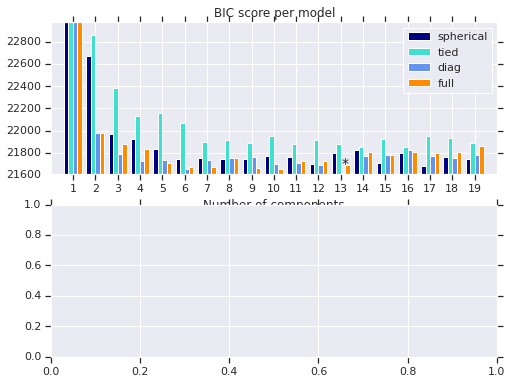

In [249]:
get_bic(arr, 20)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is depr

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated;

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated;

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is depr

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated;

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is de

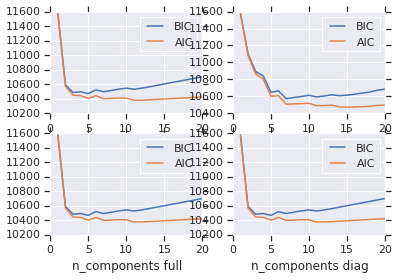

In [435]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]
co_var = ['spherical', 'tied', 'full', 'diag']
fig = plt.figure()
row = 1
for var in co_var:
    models = [GMM(n, covariance_type=var, random_state=0).fit(X)
          for n in n_components]
    plt.subplot(2,2,row)
    plt.plot(n_components, [m.bic(price_arr) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(price_arr) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components %s' % var)
    plt.title('')
    row += 1

IndexError: index 1 is out of bounds for axis 1 with size 1

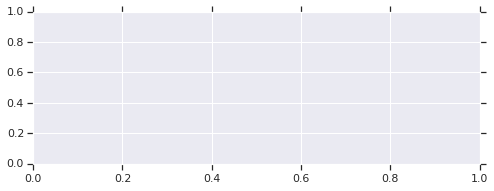

In [436]:
def plot_gmm(X, n_components, cv_type):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, random_state=0)
    gmm.fit(X)
    probs = gmm.predict_proba(X)
    lables = gmm.predict(X)
    bic = gmm.bic(X)
    plt.figure(figsize=(8, 6))
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    splot = plt.subplot(2, 1, 2)
    Y_ = gmm.predict(X)
    for i, (mean, cov, color) in enumerate(zip(gmm.means_, gmm.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: %s, %s' % (cv_type, n_components))
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return [probs, lables]


probs, lables = plot_gmm(X, 11, "full")

ValueError: Argument dimensions are incompatible

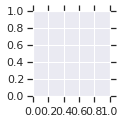

In [277]:
def plot_1d_gmm(X, n_components, cv_type):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, random_state=0)
    gmm.fit(X)
    probs = gmm.predict_proba(X)
    lables = gmm.predict(X)
    bic = gmm.bic(X)
    AIC = [gmm.aic(X)]
    BIC = [gmm.bic(X)]

    fig = plt.figure(figsize=(5, 1.7))
    fig.subplots_adjust(left=0.12, right=0.97,
                        bottom=0.21, top=0.9, wspace=0.5)


    # plot 3: posterior probabilities for each component
    ax = fig.add_subplot(133)

    p = gmm.predict_proba(X)
    p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
    p = p.cumsum(1).T

    ax.fill_between(X, 0, p[0], color='gray', alpha=0.3)
    ax.fill_between(X, p[0], p[1], color='gray', alpha=0.5)
    ax.fill_between(X, p[1], 1, color='gray', alpha=0.7)
    ax.set_xlim(-6, 6)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$p({\rm class}|x)$')

    ax.text(-5, 0.3, 'class 1', rotation='vertical')
    ax.text(0, 0.5, 'class 2', rotation='vertical')
    ax.text(3, 0.3, 'class 3', rotation='vertical')

    plt.show()

plot_1d_gmm(price_arr, 14, "full")

In [412]:
X = np.array(price)
X = X.reshape(-1, 1)
print X.shape
gmm = mixture.GaussianMixture(n_components=11, covariance_type="full", random_state=0)
gmm.fit(X)
probs = gmm.predict_proba(X)
lables = gmm.predict(X)
bic = gmm.bic(X)

(826, 1)


In [413]:
probs.shape
probs[0]

array([6.09719075e-007, 4.93878301e-007, 1.06065805e-001, 0.00000000e+000,
       0.00000000e+000, 1.67535777e-003, 6.71249028e-009, 3.31158606e-247,
       8.92257727e-001, 3.14690120e-026, 0.00000000e+000])

In [348]:
probs_max = probs.max(1)
probs_max[0], lables[0]
lables.shape

(826,)

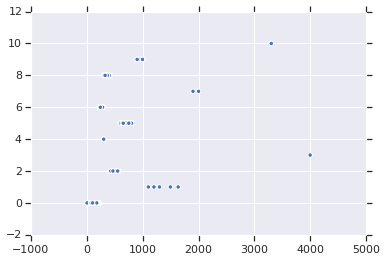

In [414]:

for i in range(11):
    l = X[lables == i, 0]
    plt.scatter(l, np.array([i for j in range(len(l))]))

In [496]:
def get_components(num, X):
    n_components = np.arange(1, num)
    models = [GMM(n, covariance_type='full', random_state=0).fit(X)
              for n in n_components]
    co_var = ['spherical', 'tied', 'full', 'diag']
    fig = plt.figure()
    row = 1
    for var in co_var:
        models = [GMM(n, covariance_type=var, random_state=0).fit(X)
              for n in n_components]
        plt.subplot(2,2,row)
        plt.plot(n_components, [m.bic(price_arr) for m in models], label='BIC')
        plt.plot(n_components, [m.aic(price_arr) for m in models], label='AIC')
        plt.legend(loc='best')
        plt.xlabel('n_components %s' % var)
        plt.title('')
        row += 1

plt.figure(figsize=(18,16))
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
#         v, w = linalg.eigh(covar)
#         v = 2. * np.sqrt(2.) * np.sqrt(v)
#         u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            print "no cluster with %s" % str(i)
            continue
        l = X[lables == i, 0]    
        plt.scatter(np.array([i for j in range(len(l))]), l, 8, color=color)

        # Plot an ellipse to show the Gaussian component
#         angle = np.arctan(u[1] / u[0])
#         angle = 180. * angle / np.pi  # convert to degrees
#         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#         ell.set_clip_box(splot.bbox)
#         ell.set_alpha(0.5)
#         splot.add_artist(ell)

    plt.title(title)

# gmm = mixture.GaussianMixture(n_components=11, covariance_type="full", random_state=0)
# gmm.fit(X)
# probs = gmm.predict_proba(X)
# lables = gmm.predict(X)
# plot_results(X, lables, gmm.means_, gmm.covariances_, 0,
#              'Gaussian Mixture')

# print "\n\n\n\n"

# dpgmm = mixture.BayesianGaussianMixture(n_components=30,
#                                         covariance_type='full').fit(X)

X = np.array(price).reshape(-1,1)
# get_components(20, X)

####### log 2 data #######
# X_log2 = np.log2(X)
# # get_components(21, X_log2)
# gmm = mixture.GaussianMixture(n_components=4, covariance_type="tied", random_state=0)
# gmm.fit(X_log2)
# probs = gmm.predict_proba(X_log2)
# lables = gmm.predict(X_log2)
# plot_results(X_log2, lables, gmm.means_, gmm.covariances_, 0,
#              'Gaussian Mixture with log2')

# plt.show()

####### log 10 data #######
X_log10 = np.log(X)
# get_components(21, X_log10)
# gmm = mixture.GaussianMixture(n_components=7, covariance_type="full", random_state=0)
# gmm.fit(X_log10)
# probs = gmm.predict_proba(X_log10)
# lables = gmm.predict(X_log10)
# plot_results(X_log10, lables, gmm.means_, gmm.covariances_, 0,
#              'Gaussian Mixture with log10')


7
cluster 0 --> samples 10, max [9.45121111], min [8.22881869]
real cluster 0 --> samples 10, max [700.], min [300.]


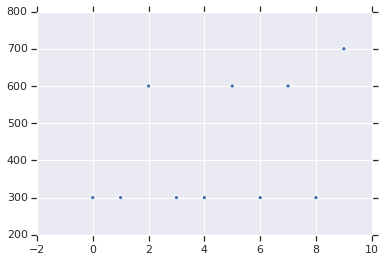

cluster 1 --> samples 211, max [15.05324713], min [13.77313921]
real cluster 1 --> samples 211, max [34000.], min [14000.]


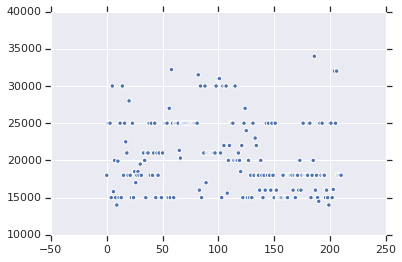

cluster 2 --> samples 74, max [16.60964047], min [15.0950673]
real cluster 2 --> samples 74, max [100000.], min [35000.]


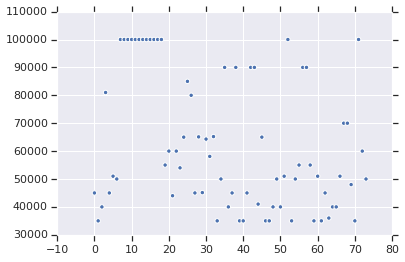

cluster 3 --> samples 20, max [12.28771238], min [9.55074679]
real cluster 3 --> samples 20, max [5000.], min [750.]


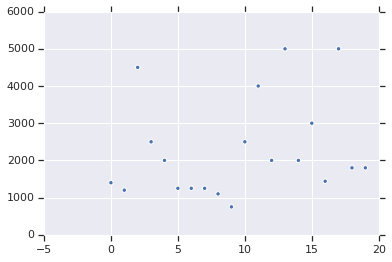

cluster 4 --> samples 108, max [13.666224], min [12.35810171]
real cluster 4 --> samples 108, max [13000.], min [5250.]


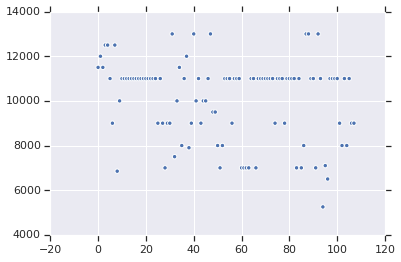

cluster 5 --> samples 7, max [18.78276791], min [17.60964047]
real cluster 5 --> samples 7, max [451000.], min [200000.]


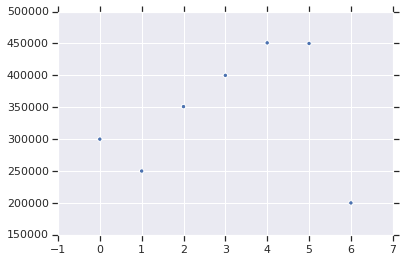

cluster 6 --> samples 1, max [0.], min [0.]
real cluster 6 --> samples 1, max [1.], min [1.]


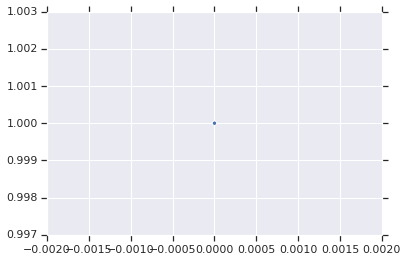

In [488]:
def get_cluster_components(lables, X, real_X):
    max_l = max(lables) +1
    print max_l
    for i in range(max_l):
        tmp = X[lables == i]
        print "cluster %s --> samples %s, max %s, min %s" % (str(i), str(len(tmp)), str(max(tmp)), str(min(tmp)))
        tmp_indexes = real_X[lables == i]
        print "real cluster %s --> samples %s, max %s, min %s" % (str(i), str(len(tmp)), str(max(tmp_indexes)), str(min(tmp_indexes)))
        x = np.array([k for k in range(len(tmp_indexes))])
        plt.scatter(x, tmp_indexes)    
        plt.show()
get_cluster_components(lables, X_log2, X)

In [464]:
gmm.covariances_[2]

array([[0.44206795]])

In [424]:
X[395], probs[395], probs_max[395]
gmm.covariances_

array([[[1.68749268e+03]],

       [[3.87994576e+04]],

       [[3.97703960e+03]],

       [[1.00000000e-06]],

       [[1.00000000e-06]],

       [[7.51479391e+03]],

       [[5.18357744e+02]],

       [[2.18926343e+03]],

       [[9.07142127e+02]],

       [[2.87112637e+03]],

       [[1.00000000e-06]]])

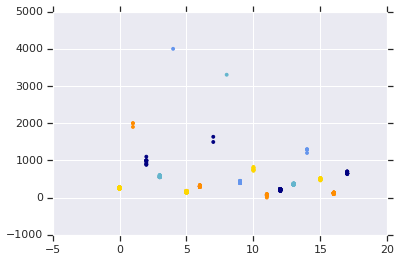

In [409]:
from sklearn.cluster import KMeans

In [286]:
p = probs.cumsum(1).T

In [407]:
X = X.reshape(-1, 1)

In [408]:
X.shape

(826, 1)

In [403]:
X = np.array(price)

In [404]:
X.shape

(826,)

In [527]:
max_mcat.sort(key=lambda x: x[2], reverse=True)
print max_mcat
test_set = unit_grouped['electric industrial oven']['number']
price = [x['PC_ITEM_FOB_PRICE'] for x in test_set]

[[u'ladies palazzo', u'piece', 826], [u'marble god statue', u'piece', 431], [u'bio fertilizers', u'kilogram', 238], [u'belt conveyors', u'unit', 219], [u'rubber conveyor belt', u'meter', 205], [u'electric irons', u'piece', 199], [u'hmi touch panel', u'piece', 171], [u'bio fertilizers', u'litre', 140], [u'belt conveyors', u'piece', 134], [u'juicer mixer grinder', u'piece', 127], [u'roller conveyor', u'piece', 112], [u'copper earthing electrode', u'piece', 107], [u'womens capri', u'piece', 105], [u'liquid filling machine', u'unit', 105], [u'fleece fabrics', u'kilogram', 103], [u'dyed polyester yarn', u'kilogram', 102], [u'hmi touch panel', u'unit', 100], [u'roller conveyor', u'unit', 99], [u'eco friendly disposable plates', u'piece', 98], [u'bottle filling machines', u'unit', 95], [u'belt conveyors', u'meter', 95], [u'liquid filling machine', u'piece', 95], [u'three phase induction motor', u'piece', 89], [u'biometric devices', u'piece', 85], [u'acme safety shoes', u'pair', 84], [u'bottle

826


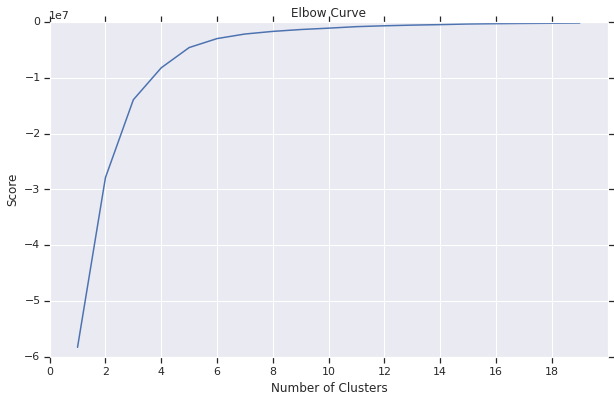

In [595]:
X = np.array(price).reshape(-1, 1)
print len(X)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(X) for i in n_cluster]
scores = [kmeans[i].score(X) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(range(0,20,2))
plt.show();



In [583]:
n_cluster

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [592]:
from math import sqrt, fabs
from matplotlib import pyplot as plp
import multiprocessing as mp
import numpy as np

class ClusterCalculator:
    m = 0
    b = 0
    sum_squared_dist = []
    derivates = []
    distances = []
    line_coordinates = []

    def __init__(self, calc_border, data):
        self.calc_border = calc_border
        self.data = data

    def calculate_optimum_clusters(self, option_parser):
        self.calculate_squared_dist()
        self.init_opt_line()
        self.calc_distances()
        self.calc_line_coordinates()
        opt_clusters = self.get_optimum_clusters()
        print("Evaluated", opt_clusters, "as optimum number of clusters")
        self.plot_results()
        return opt_clusters


    def calculate_squared_dist(self):
        for k in range(1, self.calc_border):
            print("Calculating",k, "of", self.calc_border, "\n", (self.calc_border - k), "to go!")
            kmeans = KMeans(k, self.data)
            ine = kmeans.inertia_
            print("inertia in round", k, ": ", ine)
            self.sum_squared_dist.append(ine)

    def init_opt_line(self):
        self. m = (self.sum_squared_dist[0] - self.sum_squared_dist[-1]) / (1 - self.calc_border)
        self.b = (1 * self.sum_squared_dist[0] - self.calc_border*self.sum_squared_dist[0]) / (1 - self.calc_border)

    def calc_y_value(self, x_calc):
        return self.m * x_calc + self.b

    def calc_line_coordinates(self):
        for i in range(0, len(self.sum_squared_dist)):
            self.line_coordinates.append(self.calc_y_value(i))

    def calc_distances(self):
        for i in range(0, self.calc_border):
            y_value = self.calc_y_value(i)
            d = sqrt(fabs(self.sum_squared_dist[i] - self.calc_y_value(i)))
            length_list = len(self.sum_squared_dist)
            self.distances.append(sqrt(fabs(self.sum_squared_dist[i] - self.calc_y_value(i))))
        print("For border", self.calc_border, ", calculated the following distances: \n", self.distances)

    def get_optimum_clusters(self):
        return self.distances.index((max(self.distances)))

    def plot_results(self):
        plp.plot(range(0, self.calc_border), self.sum_squared_dist, "bx-")
        plp.plot(range(0, self.calc_border), self.line_coordinates, "bx-")
        plp.xlabel("Number of clusters")
        plp.ylabel("Sum of squared distances")
        plp.show()

    def calculate_squared_dist_sliced_data(self,output, proc_numb, start, end):
        temp = []
        for k in range(start, end + 1):
            kmeans = KMeansClusterer.KMeansClusterer(k, self.data)
            ine = kmeans.calc_custom_params(self.data, k).inertia_
            print("Process", proc_numb,"had the CPU,", "calculated", ine, "in round", k)
            temp.append(ine)
        output.put((proc_numb, temp))

    def sort_result_queue(self, result):
        result.sort()
        result = [r[1] for r in result]
        flat_list= [item for sl in result for item in sl]
        return flat_list

c = ClusterCalculator(21,price)
c.calculate_squared_dist()

('Calculating', 1, 'of', 21, '\n', 20, 'to go!')


AttributeError: 'KMeans' object has no attribute 'inertia_'

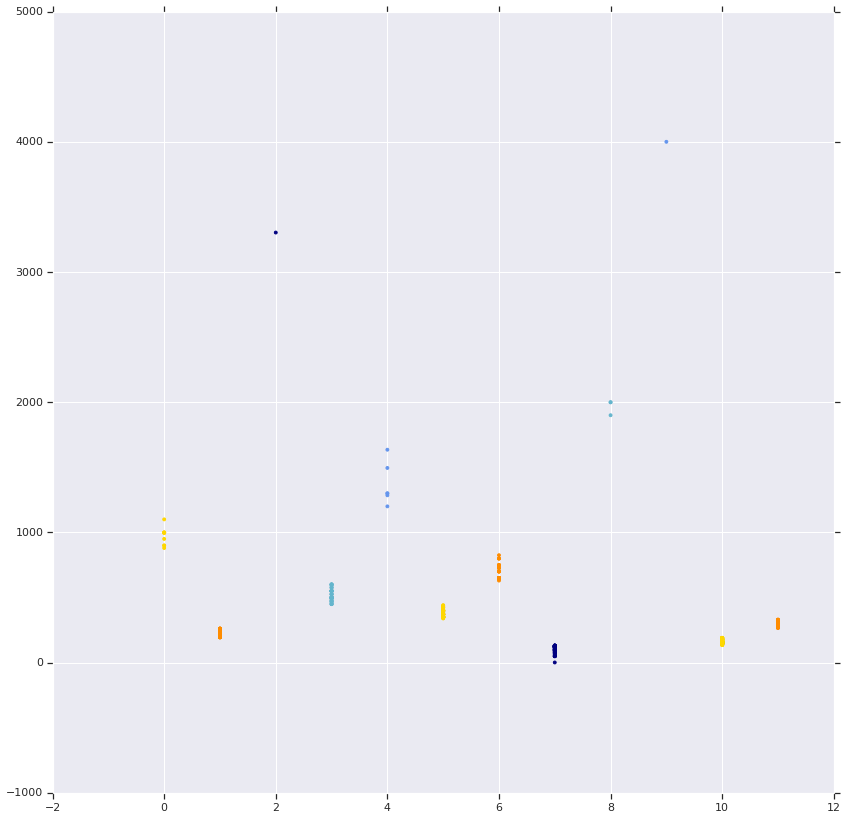

In [610]:
num = 12
kmeans = KMeans(num, random_state=0, init="k-means++")
labels = kmeans.fit(X).predict(X)
fig = plt.figure(1, figsize=(14,14))
for i, (ind,color) in enumerate(zip(range(num), color_iter)):
    l = X[labels == i, 0]
    plt.scatter(np.array([i for j in range(len(l))]), l, 8, color=color)

12
cluster 0 --> samples 10, max [1100.], min [880.]
real cluster 0 --> samples 10, max [1100.], min [880.]


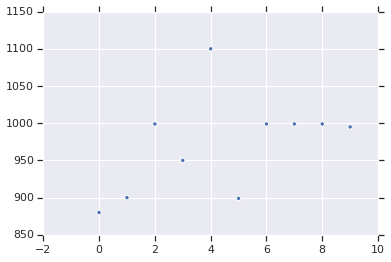

cluster 1 --> samples 213, max [260.], min [195.]
real cluster 1 --> samples 213, max [260.], min [195.]


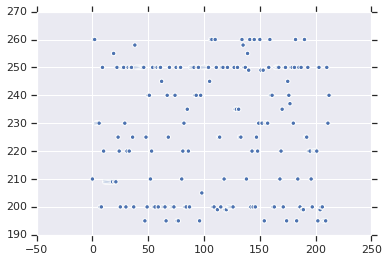

cluster 2 --> samples 1, max [3303.], min [3303.]
real cluster 2 --> samples 1, max [3303.], min [3303.]


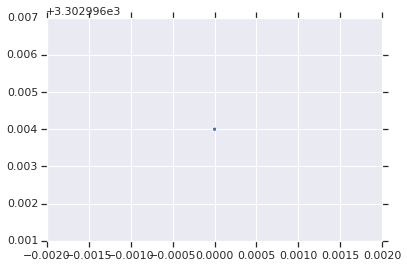

cluster 3 --> samples 50, max [600.], min [449.]
real cluster 3 --> samples 50, max [600.], min [449.]


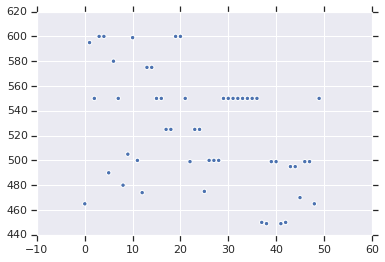

cluster 4 --> samples 6, max [1635.], min [1200.]
real cluster 4 --> samples 6, max [1635.], min [1200.]


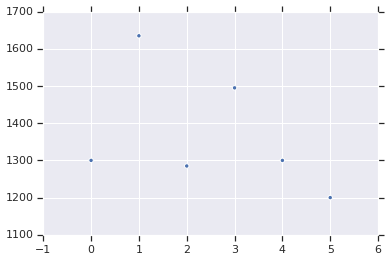

cluster 5 --> samples 102, max [440.], min [340.]
real cluster 5 --> samples 102, max [440.], min [340.]


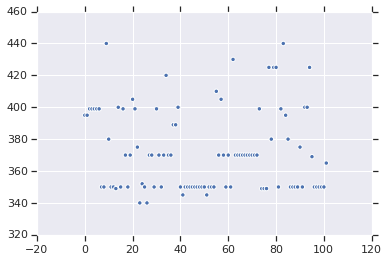

cluster 6 --> samples 28, max [825.], min [630.]
real cluster 6 --> samples 28, max [825.], min [630.]


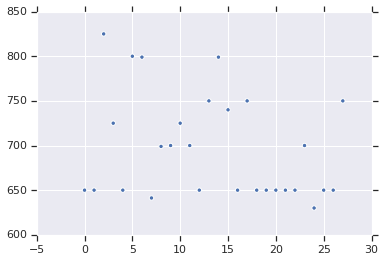

cluster 7 --> samples 69, max [130.], min [1.]
real cluster 7 --> samples 69, max [130.], min [1.]


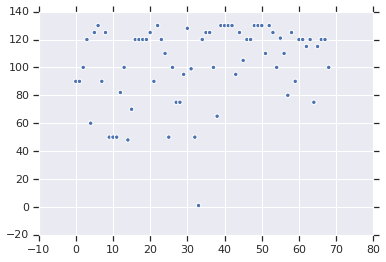

cluster 8 --> samples 3, max [2000.], min [1900.]
real cluster 8 --> samples 3, max [2000.], min [1900.]


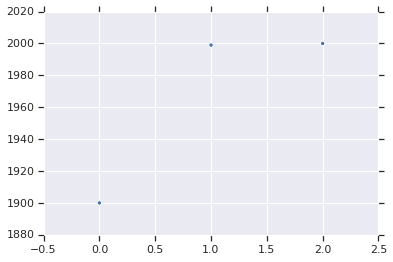

cluster 9 --> samples 1, max [4000.], min [4000.]
real cluster 9 --> samples 1, max [4000.], min [4000.]


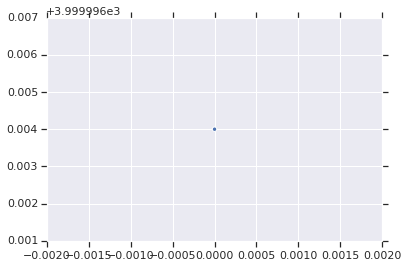

cluster 10 --> samples 205, max [190.], min [135.]
real cluster 10 --> samples 205, max [190.], min [135.]


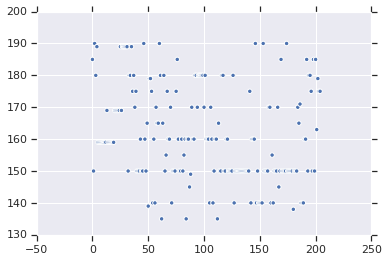

cluster 11 --> samples 138, max [330.], min [265.]
real cluster 11 --> samples 138, max [330.], min [265.]


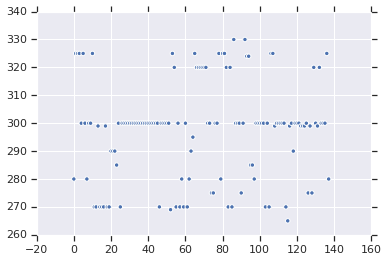

In [611]:
get_cluster_components(labels, X, X)

In [614]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = data[i][0]
        Xb = model.cluster_centers_[model.predict(Xa)[0]]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(X, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
# ddf['anomaly1'] = (distance >= threshold).astype(int)

# # visualisation of anomaly with cluster view
# fig, ax = plt.subplots(figsize=(10,6))
# colors = {0:'blue', 1:'red'}
# ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
# plt.xlabel('principal feature1')
# plt.ylabel('principal feature2')

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [615]:
for i in range(len(X)):
    if distance[i] >= threshold:
        print "anomaly %s %s" % (X[i], distance[i])

anomaly [825.] 127.38392857142867
anomaly [1635.] 265.83333333333326
anomaly [1100.] 128.0
anomaly [800.] 102.38392857142867
anomaly [799.] 101.38392857142867
anomaly [1.] 102.10144927536209
anomaly [1495.] 125.83333333333326
anomaly [1200.] 169.16666666666674
anomaly [799.] 101.38392857142867


In [620]:
import sklearn
sklearn.__version__


'0.19.1'

In [561]:
X[0][0], kmeans.cluster_centers_[kmeans.predict(X[0][0])[0]][0]

(395.0, 372.2058823529413)

In [563]:
np.linalg.norm(X[0][0] - kmeans.cluster_centers_[kmeans.predict(X[0][0])[0]][0])

22.794117647058727

In [531]:
ureg = UnitRegistry()

In [539]:
gt_5 = [x for x in max_mcat if x[2] >=5]
len(gt_5)

246

In [540]:
len(max_mcat)

625

Automatically created module for IPython interactive environment
('For n_clusters =', 2, 'The average silhouette_score is :', 0.8937667385408797)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.7326716139985749)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.7064621175302989)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.5869212690133891)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.5977465869532612)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.5825180543384619)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.5689499170941643)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.5587787812695592)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.5691003265685799)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.5523916775827902)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.5715482672064889)
('For n_clusters =', 13, 'The average sil

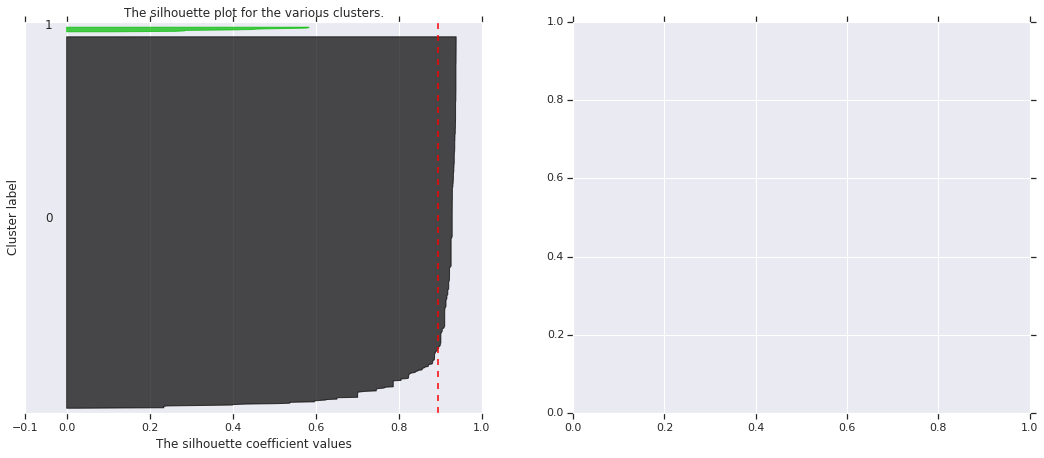

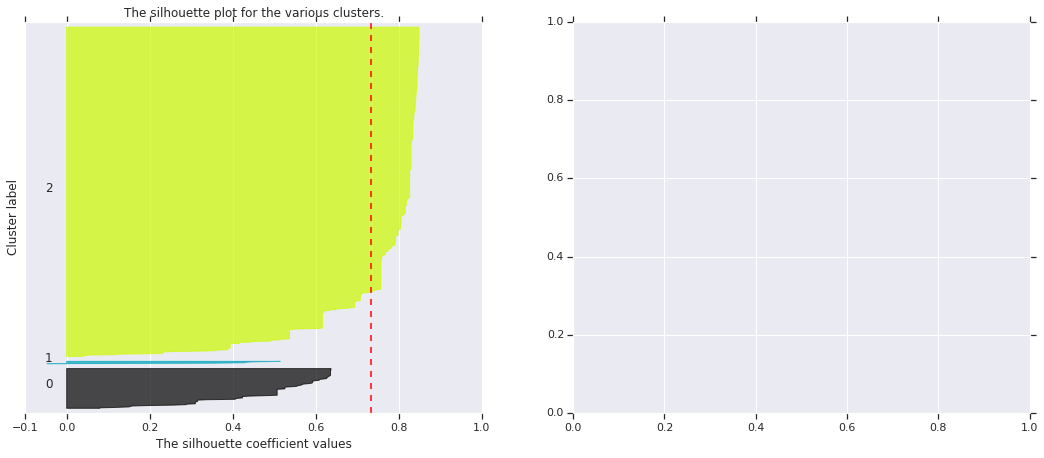

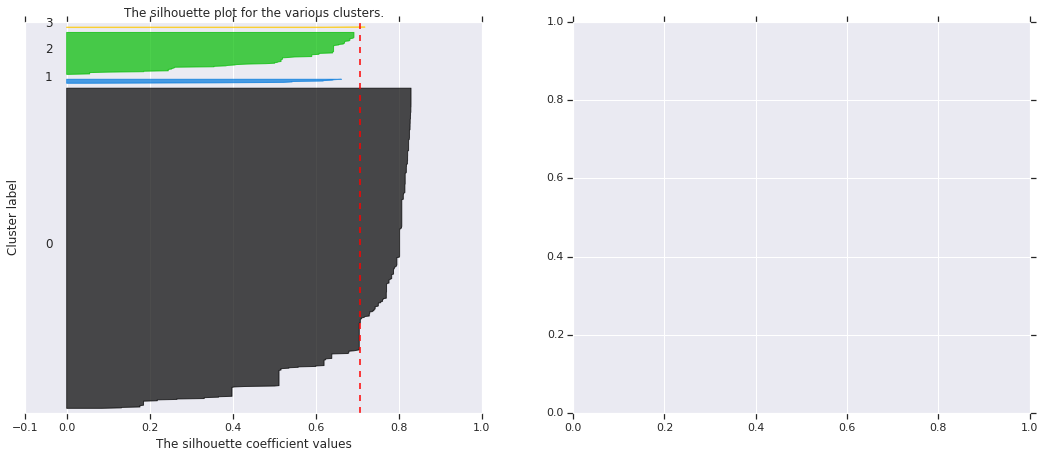

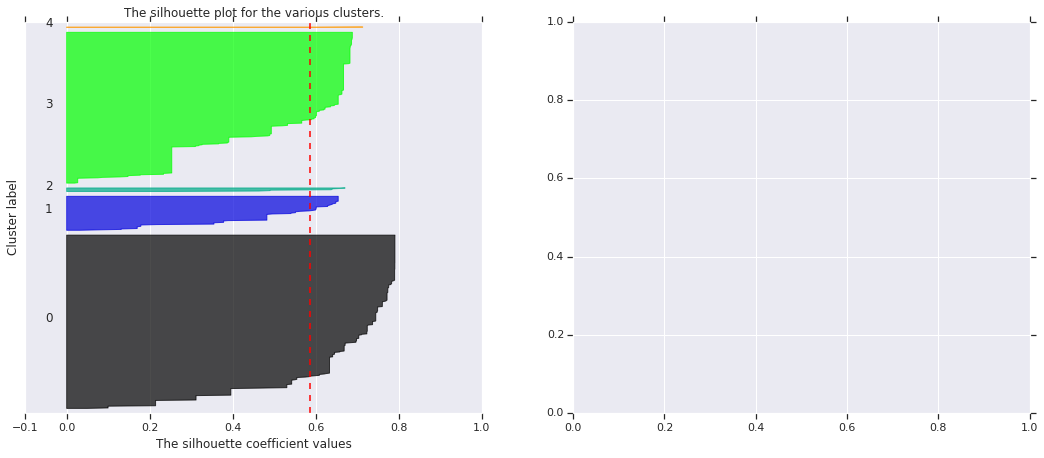

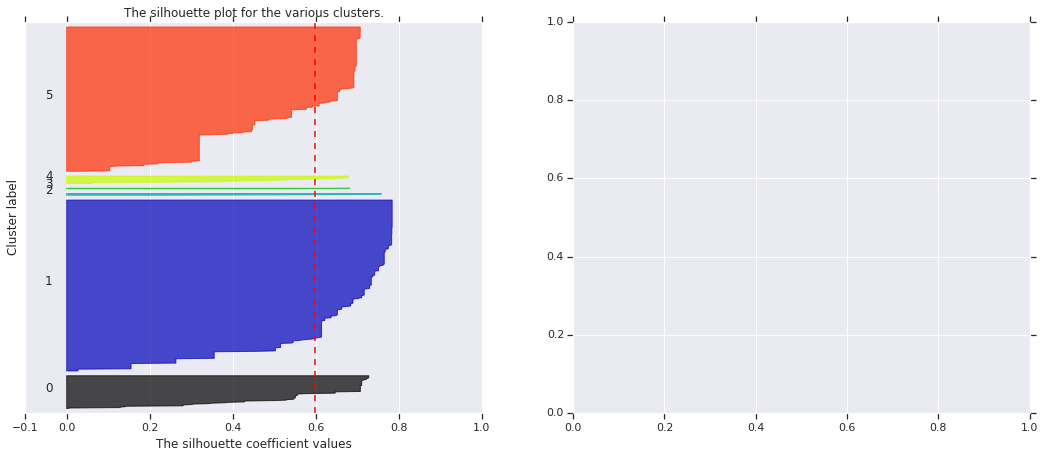

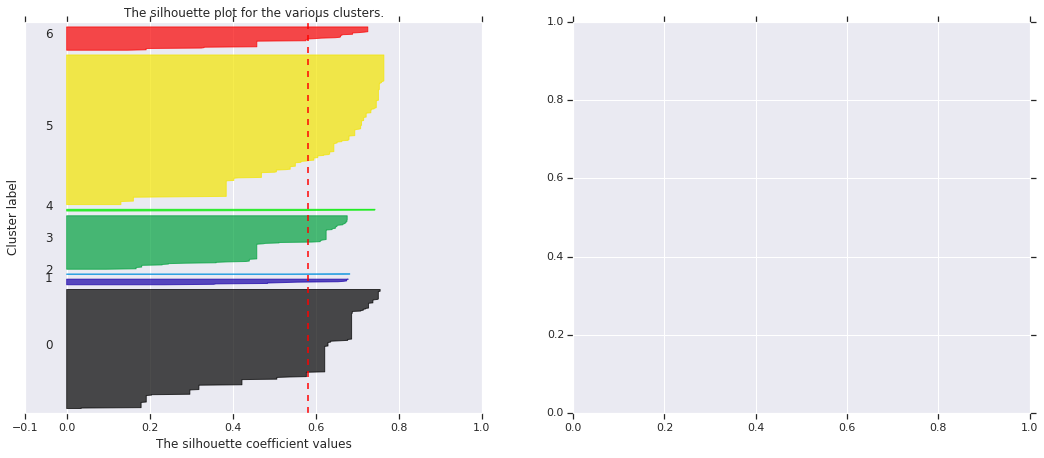

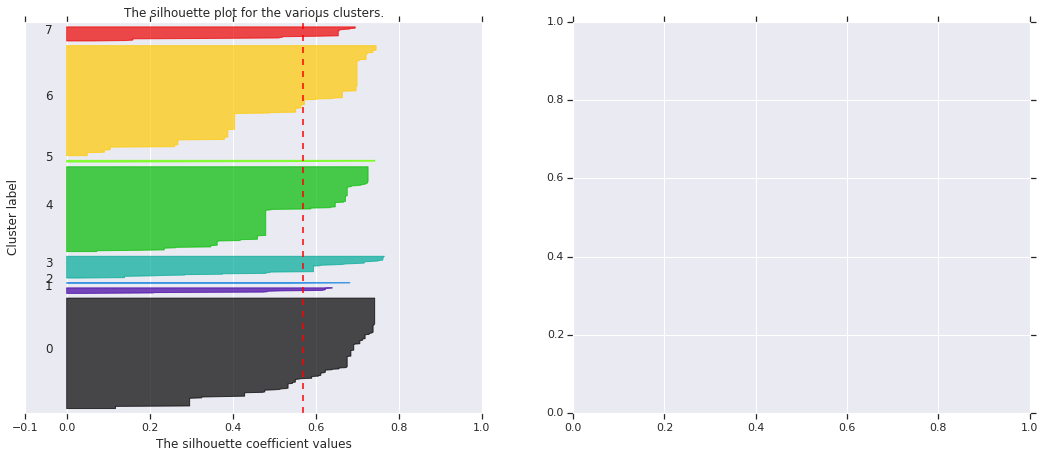

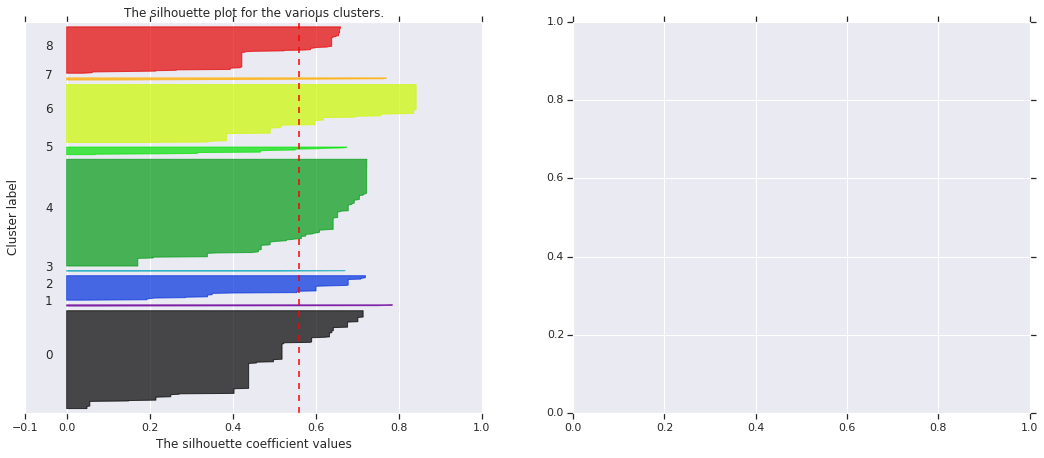

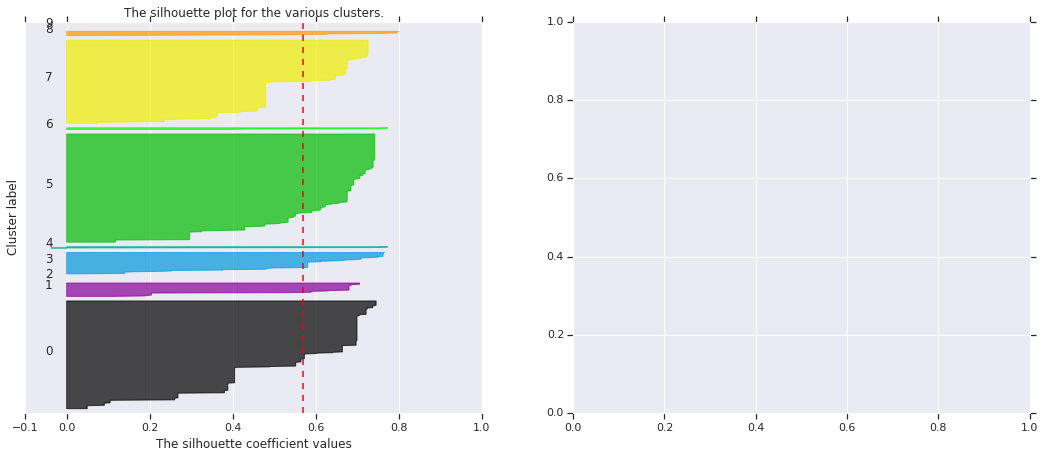

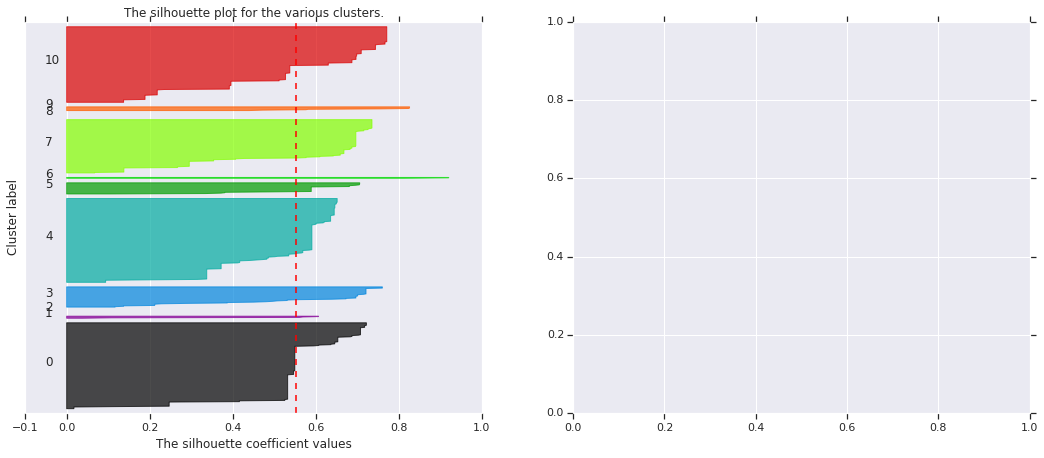

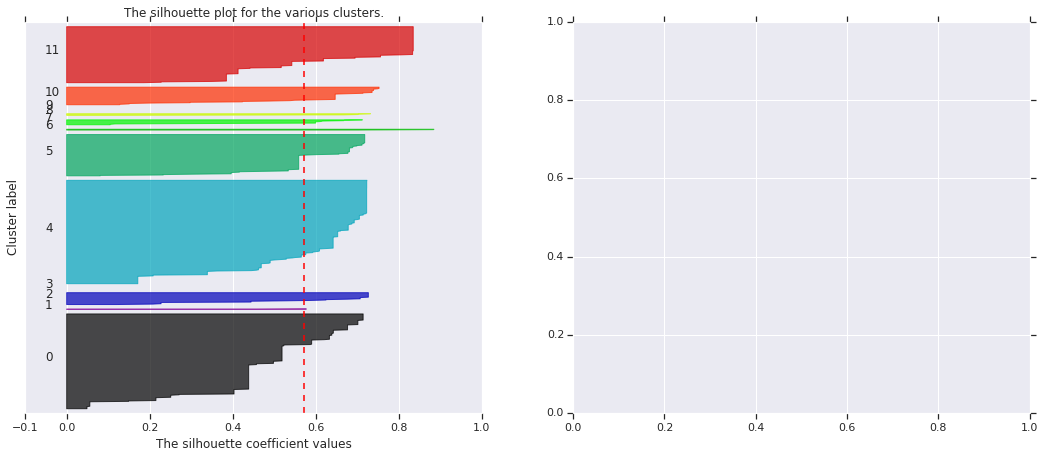

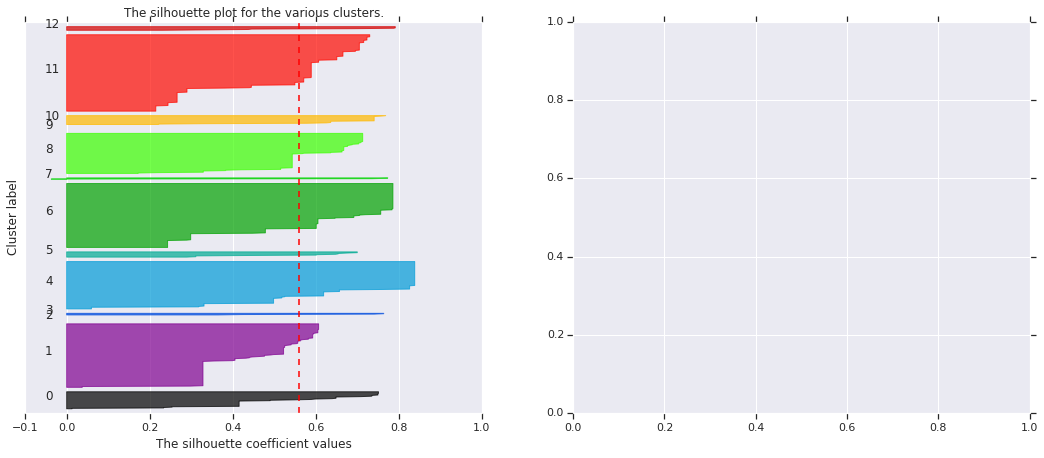

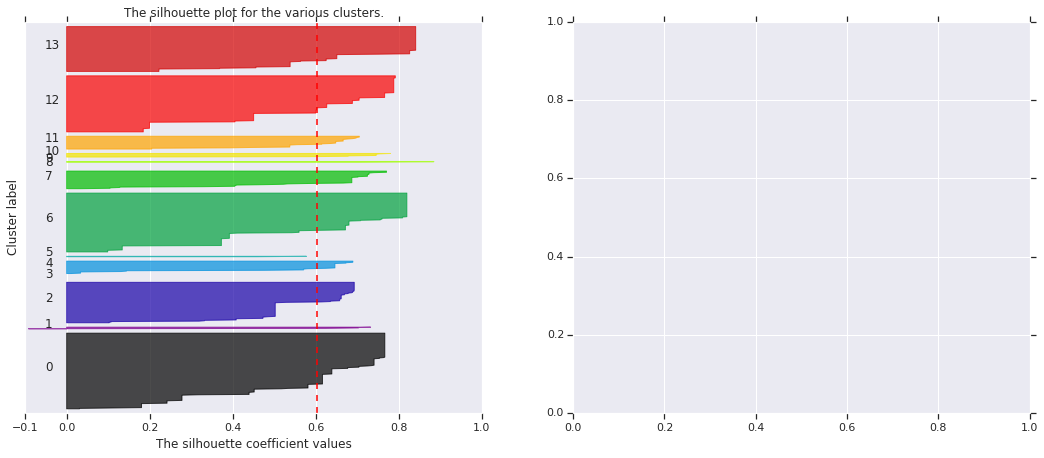

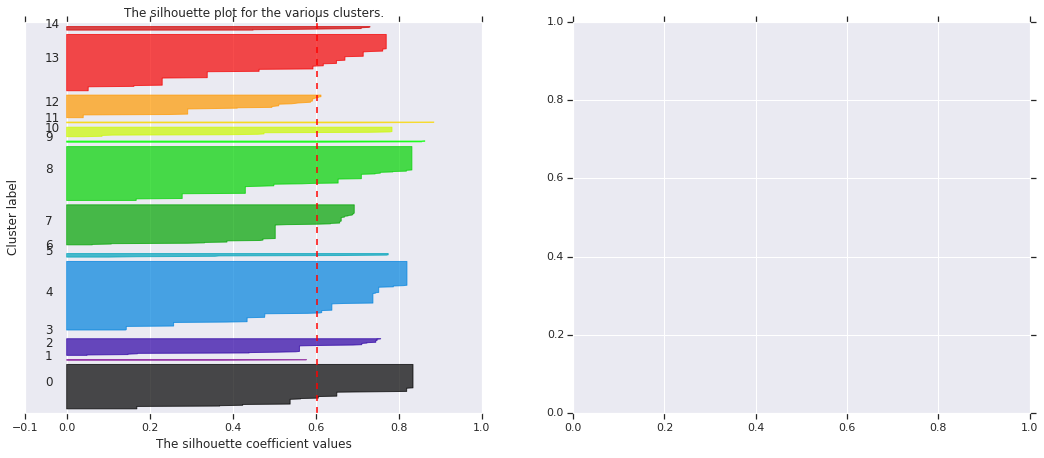

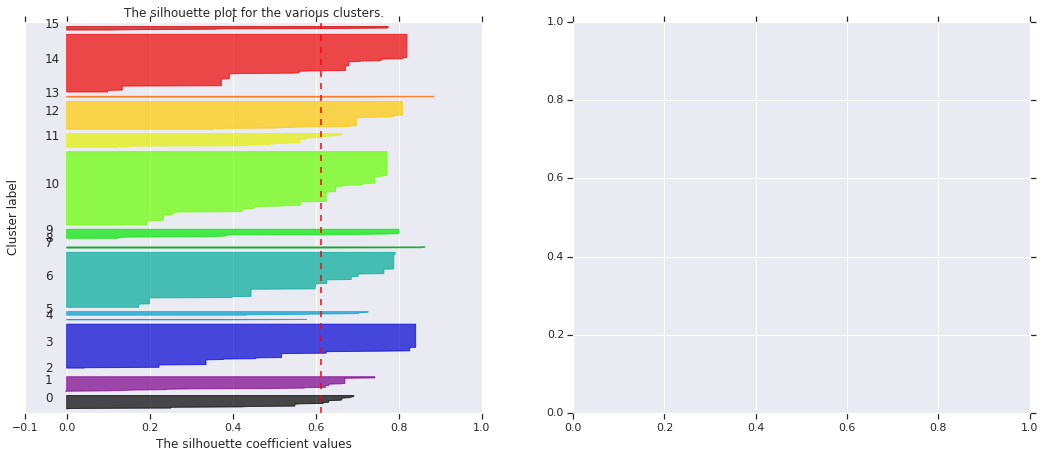

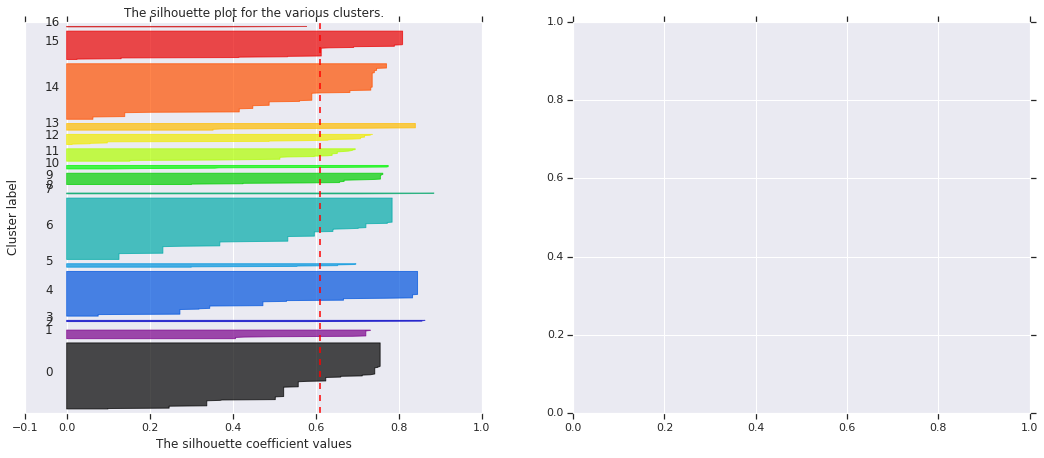

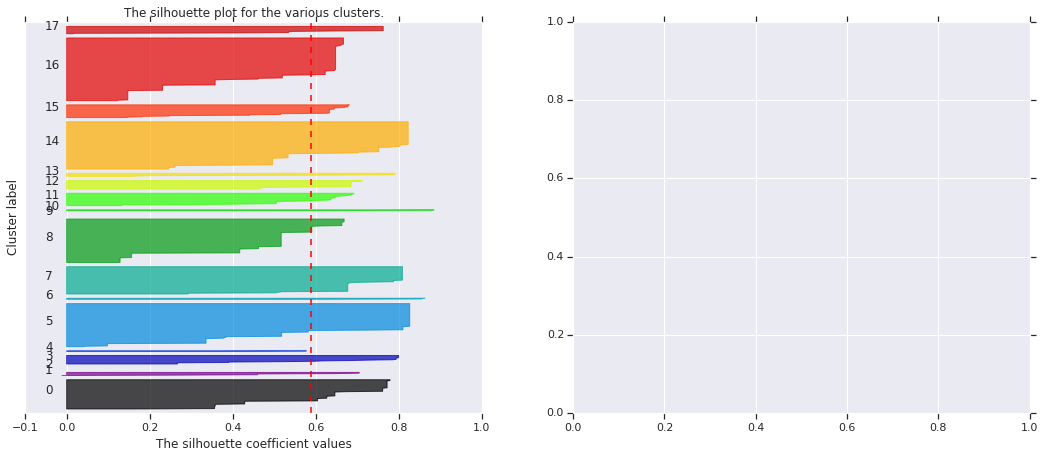

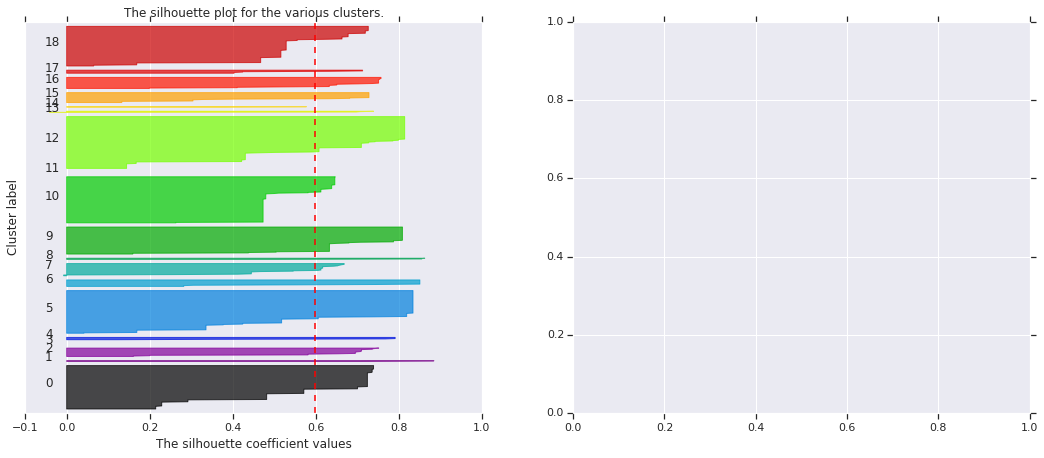

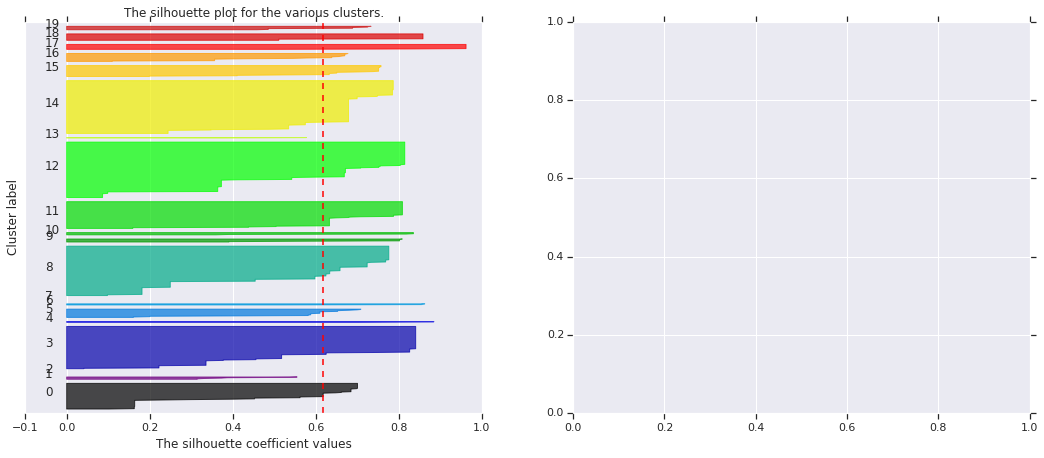

In [601]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = np.array(price).reshape(-1,1)# For reproducibility

range_n_clusters = range(2,21)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

In [ ]:
ureg.define('fraction = [] = frac')